# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?


## Problem 1: Answer

- The dataset doesn't have any independent variable that help to determine the number of campaigns.
- According to the given documentations(CRISP-DM-BANK.pdf), this dataset is collected is related to 17 campaigns that occurred between May 2008 and November 2010
- 
```
The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

```

### Other key informaton
- The overall success rate was about **11%**, meaning approximately **6,944 clients** subscribed to a long-term deposit following these contacts.  
- Primary mode of campaign is **Telephone calls** (direct telemarketing). Other channels, such as internet banking, exists but were not the focus of this dataset.  


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.info()

#Check missing value
df.isna().sum()

# There are 41188 records, all the values are present, lets check the quality of data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# Check based on the datatype any value represents missing value
df.select_dtypes(include=['number']).columns.tolist()
df.select_dtypes(include=['number'])

#12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#14 - previous: number of contacts performed before this campaign and for this client (numeric)

# New column can be added to represent if the customer has contacted before using pdays as 999 or campaign as 0



,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [6]:
# Checking the Categorical features for missing value, specifically look for Categorical value unknown/na


#There are no missing values. But some of the Categorical features has 'unknown' value like Job, marital, education. 
#Since this is very small percentile, this might not need to be removed, but need a deeper look in pre-processing

categorical_featueres = df.select_dtypes(include=['object']).columns.tolist()
unknown_stats = {}
for fea in categorical_featueres:
    stats = df[fea].value_counts(normalize=True).apply(lambda x: f'{x*100:.2f}%')
    if 'unknown' in stats:
        unknown_stats[fea] = [stats['unknown']]

print("\033[1mUnknown values on Dataset Categorical features \033[0m \n")
display(pd.DataFrame(data=unknown_stats))

#5 - default: has credit in default? (categorical: 'no','yes','unknown')
# default has the concerning level of 'unknown' values. By considerring the other fields[Yes(0.01%)/No(79.12%)], this can be treated as No
print("\033[1m default \033[0m has the concerning level of 'unknown' values. By considerring the other fields[Yes(0.01%)/No(79.12%)], this can be treated as No\n")


# month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
#df['month'].value_counts(normalize=True).apply(lambda x: f'{x*100:.2f}%') 
    # It has value for 10 months, though the campaign run for multi-year(May 2008 and November 2010)
    # Mising months are JAN, FEB

print("\033[1m month(last contact month of year) \033[0m don't have any value for Jan & Feb, \
though the campaign run for multi-year(May 2008 and November 2010). \
Either Campaign hasn't operated during this month period, \
need to check wit Business to understand more on this\n")



Unknown values on Dataset Categorical features  



,job,marital,education,default,housing,loan
0,0.80%,0.19%,4.20%,20.87%,2.40%,2.40%


 default  has the concerning level of 'unknown' values. By considerring the other fields[Yes(0.01%)/No(79.12%)], this can be treated as No

 month(last contact month of year)  don't have any value for Jan & Feb, though the campaign run for multi-year(May 2008 and November 2010). Either Campaign hasn't operated during this month period, need to check wit Business to understand more on this



In [7]:
# check the duplicates
print(f"Number of Duplicate records {df.duplicated().sum()}, and should be removed")

# There are 12 duplicate records, remove the duplicates
# since this is low in number compare to number of observations(41188), safe to drop the duplicates
df = df.drop_duplicates()

Number of Duplicate records 12, and should be removed


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

## Business Objective:

- The primary objective of this project is to identify customers who are most likely to subscribe to a long-term deposit. The bank’s direct marketing campaigns, conducted mainly through phone calls, currently achieve only about an 11% success rate. This low conversion rate means that the majority of customer contacts do not result in subscriptions, driving up the cost of customer acquisition and placing unnecessary strain on marketing resources and customer service teams.
- By building a predictive model that can better distinguish between customers likely to subscribe and those who are not, the bank can significantly improve the efficiency of its campaigns. Such a model would allow the institution to focus its efforts on high-potential clients, reduce wasted calls, and ultimately lower campaign costs while improving overall return on investment and customer satisfaction.

In [8]:
#Check if any variable more dependent on each other
df.select_dtypes(include=['number']).corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


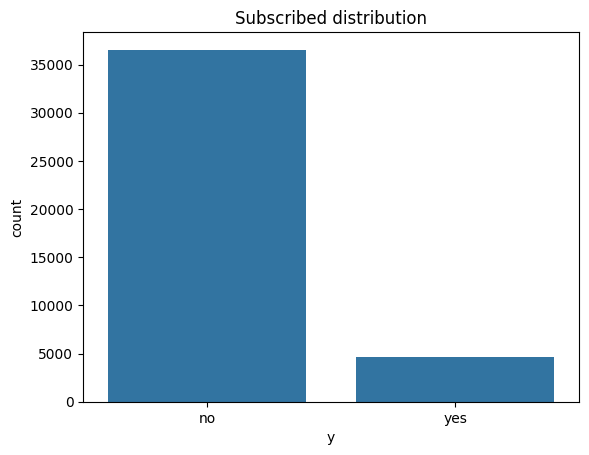

In [66]:
# Univariable analysis
sns.countplot(x="y", data=df)
plt.title('Subscribed distribution')
plt.show()

campaign
1    42.45%
2    25.53%
3    13.07%
4     6.55%
5     3.96%
Name: proportion, dtype: object

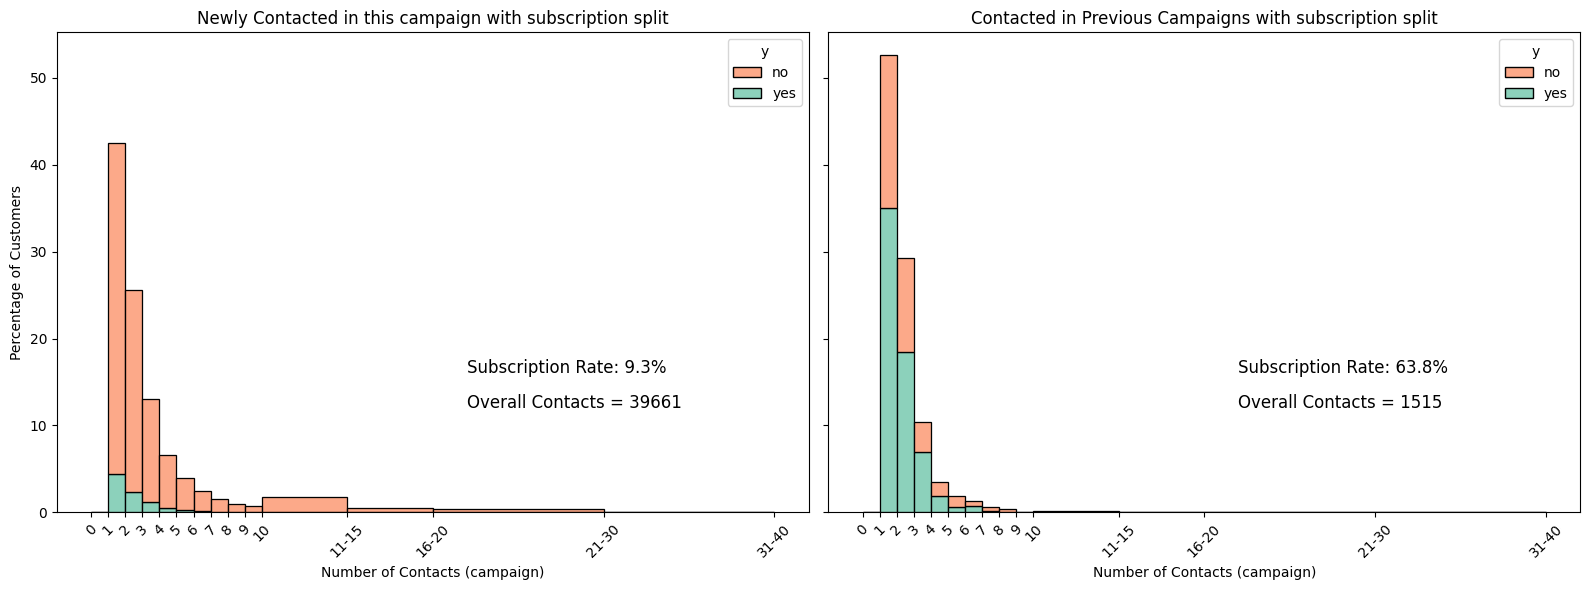

In [67]:
#12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#14 - previous: number of contacts performed before this campaign and for this client (numeric)

#df[df['campaign' == 0]]
display(df[df['pdays'] == 999]['campaign'].value_counts(normalize=True).head(5).apply(lambda x: f'{x*100:.2f}%'))


bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,30,40]
xticks = [0,1,2,3,4,5,6,7,8,9,10,15,20,30,40]
xticklabels = ["0","1","2","3","4","5","6","7","8","9","10","11-15","16-20","21-30","31-40"]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# --- Never contacted ---
sns.histplot(
    x="campaign", 
    data=df[df['pdays'] == 999], 
    hue="y", 
    bins=bins, 
    stat="percent", 
    multiple="stack",
    palette=["#fc8d62", "#66c2a5"],
    ax=axes[0]
)
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xticklabels, rotation=45)
axes[0].set_title("Newly Contacted in this campaign with subscription split")
axes[0].set_xlabel("Number of Contacts (campaign)")
axes[0].set_ylabel("Percentage of Customers")

# --- Previously contacted ---
sns.histplot(
    x="campaign", 
    data=df[df['pdays'] != 999], 
    hue="y", 
    bins=bins, 
    stat="percent", 
    multiple="stack",
    palette=["#fc8d62", "#66c2a5"],
    ax=axes[1]
)
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticklabels, rotation=45)
axes[1].set_title("Contacted in Previous Campaigns with subscription split")
axes[1].set_xlabel("Number of Contacts (campaign)")
axes[1].set_ylabel("")


df_never = df[df['pdays'] == 999]
df_prev  = df[df['pdays'] != 999]

rate_never = df_never['y'].eq("yes").mean() * 100
rate_prev  = df_prev['y'].eq("yes").mean() * 100
count_never = len(df_never)
count_prev  = len(df_prev)

axes[0].text(22, 16, f"Subscription Rate: {rate_never:.1f}%", fontsize=12, color="black")
axes[0].text(22, 12, f"Overall Contacts = {count_never}", fontsize=12, color="black")

axes[1].text(22, 16, f"Subscription Rate: {rate_prev:.1f}%", fontsize=12, color="black")
axes[1].text(22, 12, f"Overall Contacts = {count_prev}", fontsize=12, color="black")


# Adjust layout
plt.tight_layout()
plt.show()

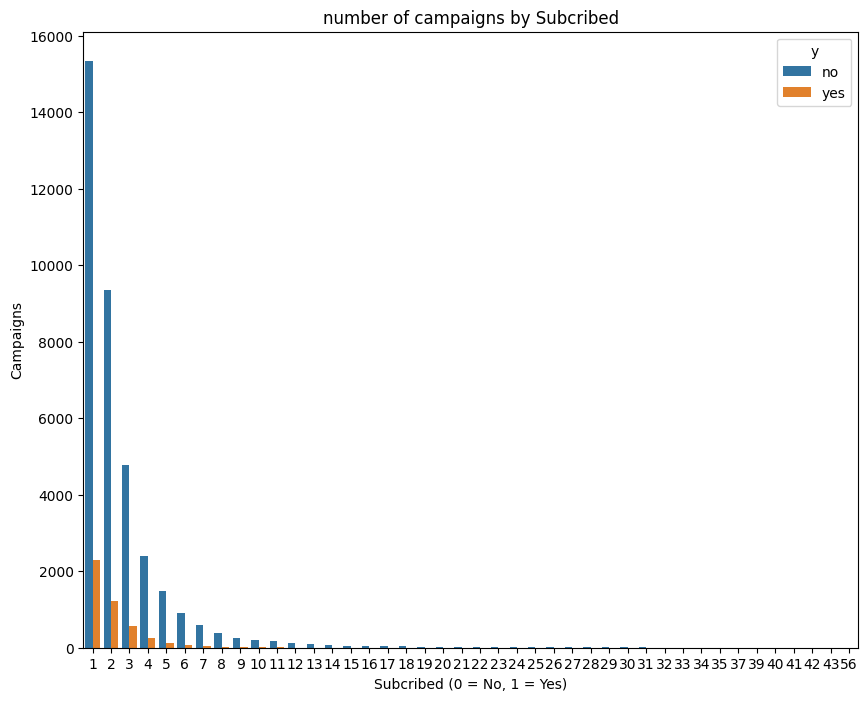

In [11]:
plt.figure(figsize=(10, 8))
sns.countplot(x='campaign', hue='y', data=df)
plt.title('number of campaigns by Subcribed')
plt.xlabel('Subcribed (0 = No, 1 = Yes)')
plt.ylabel('Campaigns')
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [12]:
df2 = df.copy(deep=True)


In [13]:
df2.select_dtypes(include=['object']).columns.tolist()


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [14]:
# job - - One Hot encoding
# marital - One Hot encoding
# education - ordial encoding
# default - covert to binary, unknown can be no
# housing & loan drop and add a new column as have_loans
# contact - not a big influencer
# month & day_of_week - not a big influencer
# poutcome - previous campaign outcome

df2[['poutcome']].value_counts()



poutcome   
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

In [15]:
# Encode target possible values are yes/no
df2['subscribed'] = df2['y'].map({'yes': 1, 'no': 0})
df2.drop(columns = ['y'], inplace = True)

# default
mapping = {'yes': 1, 'no': 0, 'unknown':0}
df2['default'] = df2['default'].map(mapping).fillna(0).astype(int)




In [16]:
# add a new feature, that represents if client has contacted in previous campaign
df2['never_contacted'] = (df2['pdays'] == 999).astype(int)

# Create a new feature that tells if the customer has at least one loan
df2['have_loan'] = ((df2['housing'] == 'yes') | (df2['loan'] == 'yes')).astype(int)


In [17]:
df2.describe(percentiles=[.75,.90, .99]).round(2)

,age,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,never_contacted,have_loan
count,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,0.00,258.32,2.57,962.46,0.17,0.08,93.58,-40.50,3.62,5167.03,0.11,0.96,0.59
std,10.42,0.01,259.31,2.77,186.94,0.49,1.57,0.58,4.63,1.73,72.25,0.32,0.19,0.49
min,17.00,0.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00,0.00,0.00
50%,38.00,0.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00,1.00,1.00
75%,47.00,0.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00,1.00,1.00
90%,55.00,0.00,551.00,5.00,999.00,1.00,1.40,94.46,-36.10,4.96,5228.10,1.00,1.00,1.00
99%,71.00,0.00,1271.25,14.00,999.00,2.00,1.40,94.46,-26.90,4.97,5228.10,1.00,1.00,1.00
max,98.00,1.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00,1.00,1.00


In [18]:
# remove the outliner
# Over all  60 records more than 2000 seconds duration, out of 41187. It is safe to drop these outliners
df2 = df2[df2['duration'] <= 2000]

# Over all  157 records more than 20 campaigns, out of 41187. It is safe to drop these outliners
df2 = df2[df2['campaign'] <= 20]

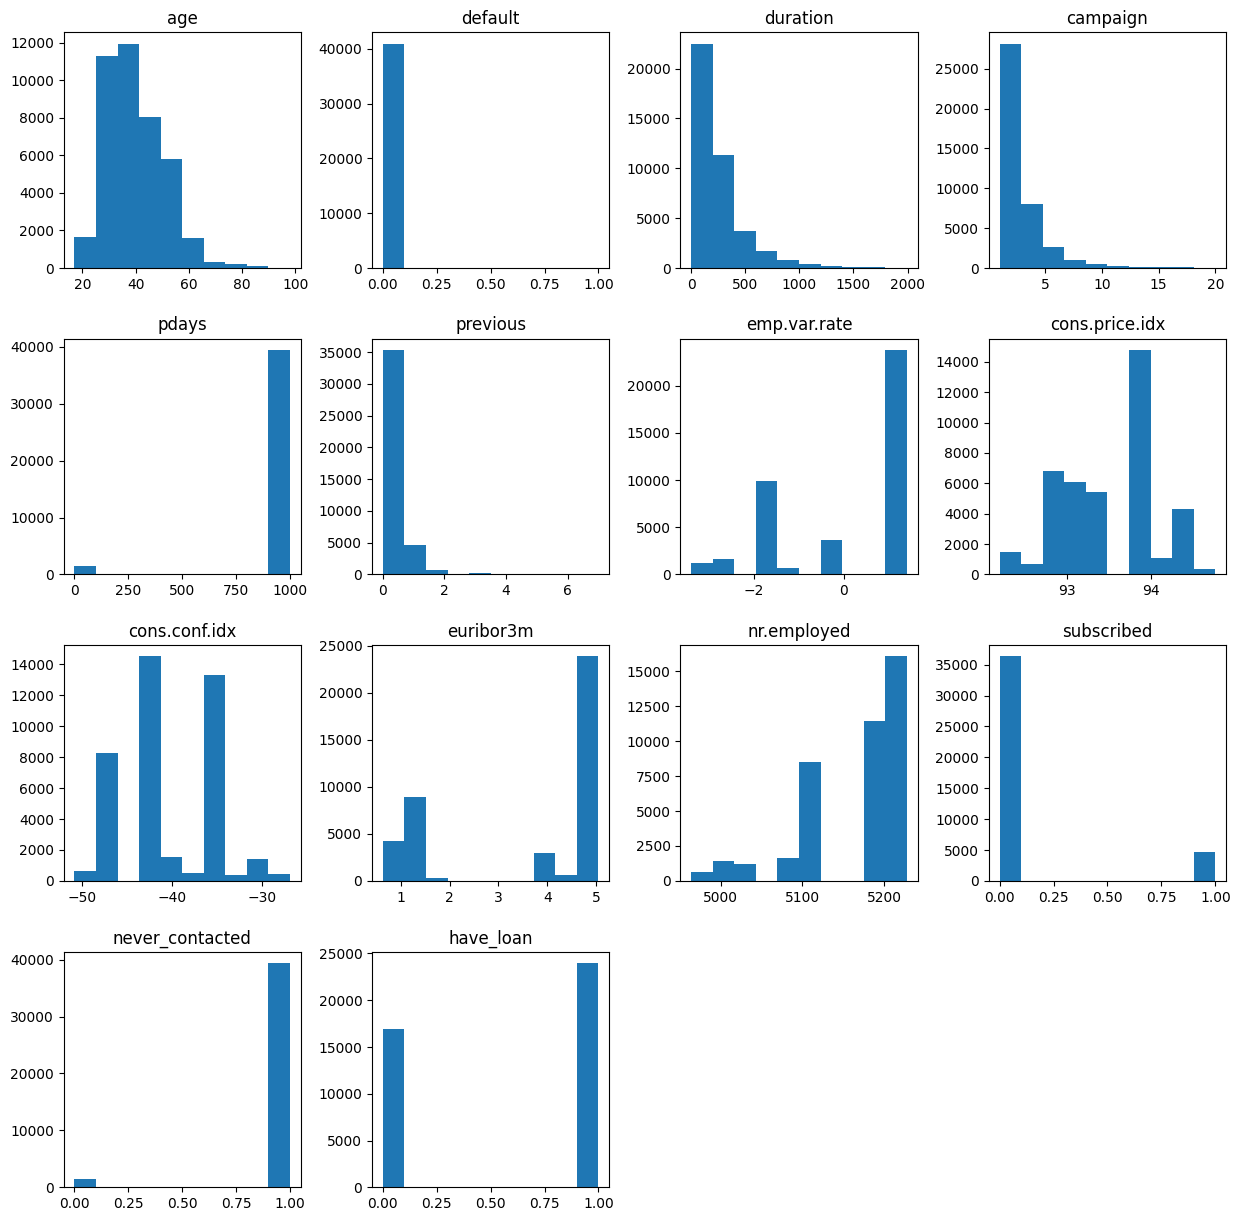

In [19]:
df2.hist(figsize = (15, 15), grid = False);

In [20]:
cat_list = df2.select_dtypes("object").columns.tolist()
cat_list

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

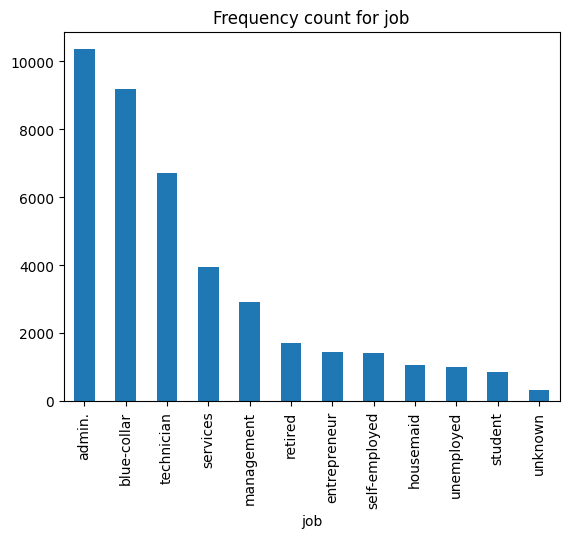

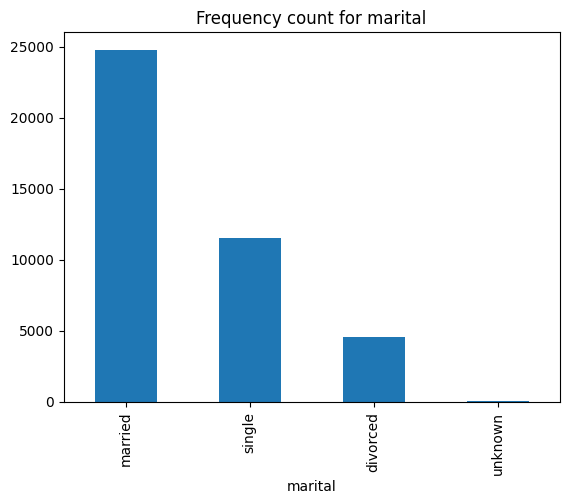

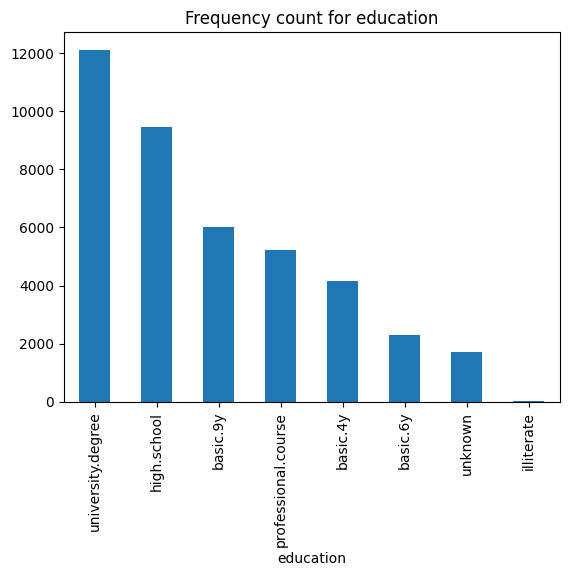

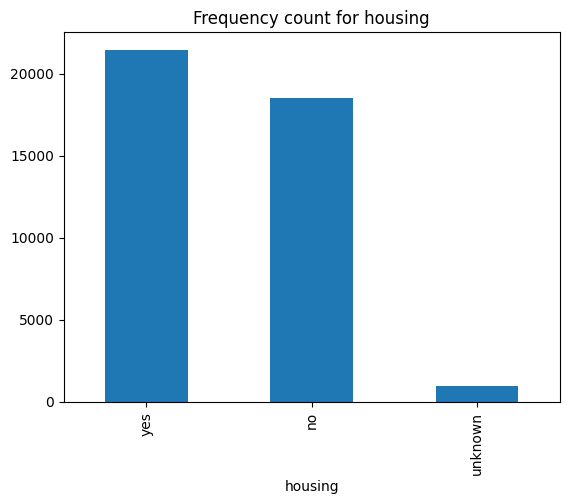

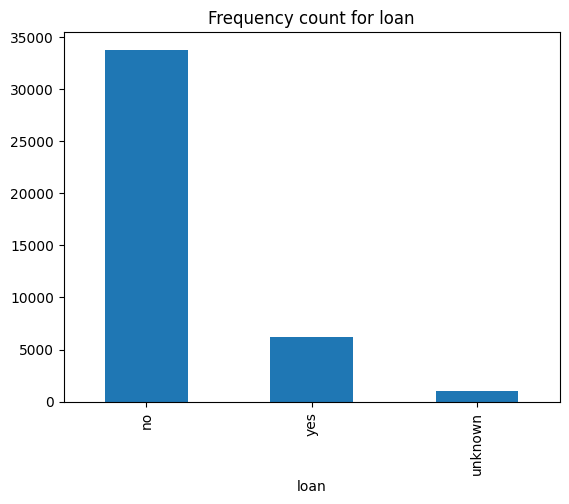

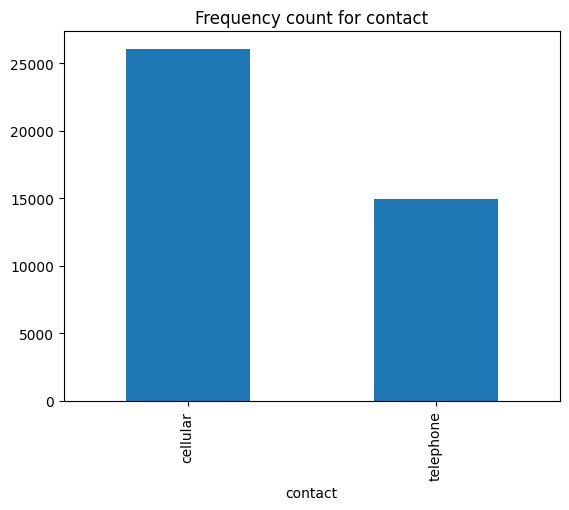

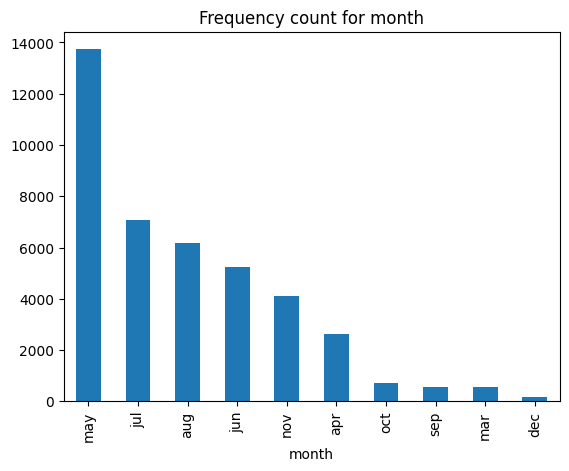

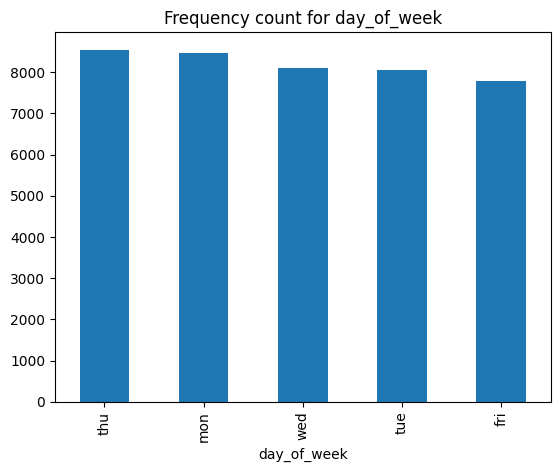

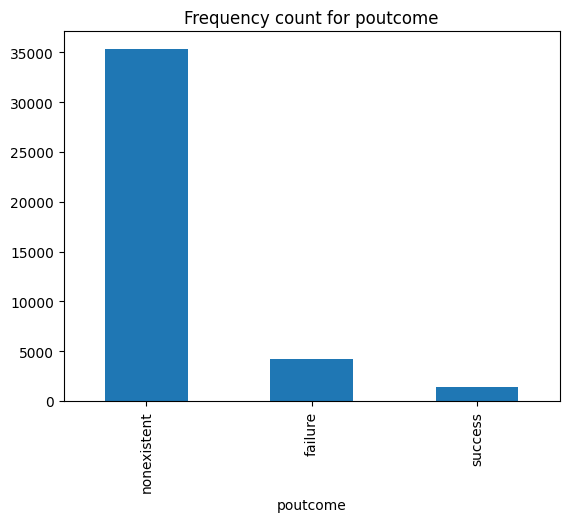

In [21]:
for cat in cat_list:
    df2[cat].value_counts().plot(kind = 'bar', title = f"Frequency count for {cat}")
    #df[cat].value_counts().plot(kind = 'bar', backend = 'plotly')
    plt.show();

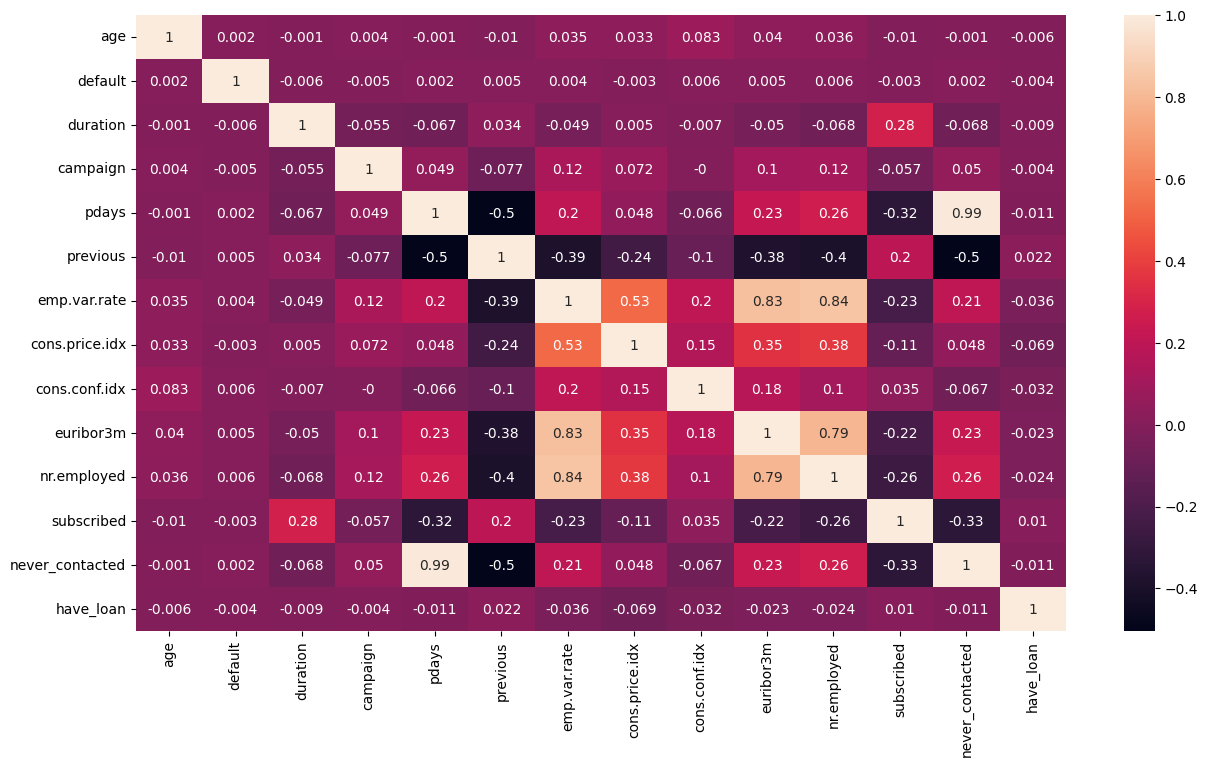

In [22]:
corr = (df2
        .corr(numeric_only = True, method = "kendall")
        .round(3)
       )

plt.figure(figsize= (15,8))
sns.heatmap(corr, annot= True);

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [23]:
# data prep
from sklearn.model_selection import train_test_split

In [24]:
# splitting the data 
X = df2.drop(columns = ['subscribed','housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
y = df2['subscribed']

In [25]:
# # doing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [26]:
print("x_train: ", X_train.shape)
print("y_train: ", y_train.shape)


print("\n")

print("x_test: ", X_test.shape)
print("y_test: ", y_test.shape)

display(X_train.head())
display(y_train.head())

x_train:  (32767, 16)
y_train:  (32767,)


x_test:  (8192, 16)
y_test:  (8192,)


,age,job,marital,education,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,never_contacted,have_loan
29542,52,admin.,divorced,basic.9y,0,9,5,999,1,-1.8,93.075,-47.1,1.405,5099.1,1,1
1777,32,retired,married,high.school,0,209,3,999,0,1.1,93.994,-36.4,4.855,5191.0,1,0
14771,37,entrepreneur,divorced,high.school,0,344,3,999,0,1.4,93.918,-42.7,4.957,5228.1,1,0
4697,47,technician,single,professional.course,0,27,1,999,0,1.1,93.994,-36.4,4.858,5191.0,1,0
32639,23,blue-collar,single,basic.9y,0,657,1,999,0,-1.8,92.893,-46.2,1.299,5099.1,1,1


29542    0
1777     0
14771    0
4697     0
32639    1
Name: subscribed, dtype: int64

In [27]:
X_train.select_dtypes(['int', 'float']).head()

,age,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,never_contacted,have_loan
29542,52,0,9,5,999,1,-1.8,93.075,-47.1,1.405,5099.1,1,1
1777,32,0,209,3,999,0,1.1,93.994,-36.4,4.855,5191.0,1,0
14771,37,0,344,3,999,0,1.4,93.918,-42.7,4.957,5228.1,1,0
4697,47,0,27,1,999,0,1.1,93.994,-36.4,4.858,5191.0,1,0
32639,23,0,657,1,999,0,-1.8,92.893,-46.2,1.299,5099.1,1,1


In [28]:
to_be_scaled_cols = ['age', 'duration', 'pdays', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',	'euribor3m',	'nr.employed']

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

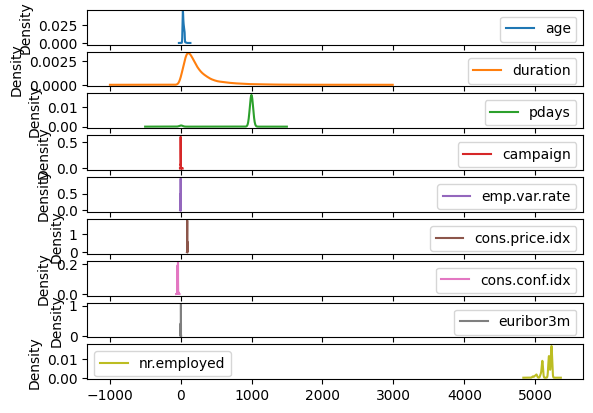

In [29]:
X_train[to_be_scaled_cols].plot(kind = 'kde', subplots = True)

In [30]:
from sklearn.preprocessing import StandardScaler

# calling the scaler
scaler = StandardScaler()

# train data scaling
X_train[to_be_scaled_cols] = scaler.fit_transform(X_train[to_be_scaled_cols])

# test data scaling
X_test[to_be_scaled_cols] = scaler.transform(X_test[to_be_scaled_cols])

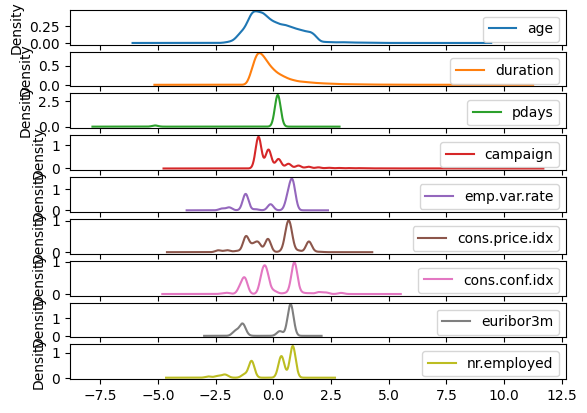

In [31]:
X_train[to_be_scaled_cols].plot(kind = 'kde', subplots = True);

In [32]:
X_train[to_be_scaled_cols].agg(['mean', 'std']).round(1)

,age,duration,pdays,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
mean,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [33]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
dummy = DummyClassifier()

In [35]:
dummy.fit(X_train, y_train)


DummyClassifier()

In [36]:
print(f"The accuracy score of the model for Train is {dummy.score(X_train, y_train):.2f}")
print(f"The accuracy score of the model for Test is {dummy.score(X_test, y_test):.2f}")

The accuracy score of the model for Train is 0.89
The accuracy score of the model for Test is 0.89


In [37]:
y_pred = dummy.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Confusion Matrix:
 [[7283    0]
 [ 909    0]]

Classification Report:
               precision    recall  f1-score   support

           0      0.889     1.000     0.941      7283
           1      0.000     0.000     0.000       909

    accuracy                          0.889      8192
   macro avg      0.445     0.500     0.471      8192
weighted avg      0.790     0.889     0.837      8192



In [38]:
from sklearn.model_selection import cross_val_score

lr_cv_scores = cross_val_score(dummy, X_train, y_train, cv = 5)

# print the score
print([f"{score:.3f}" for score in lr_cv_scores])
print('\n')
print(f"The mean accuracy across cv = 5 was {lr_cv_scores.mean():.3f}")

['0.887', '0.887', '0.887', '0.887', '0.887']


The mean accuracy across cv = 5 was 0.887


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
X_train.select_dtypes(include=['object']).columns.tolist()
X_train.select_dtypes(include=['number']).columns.tolist()

X_train.isna().sum()

age                0
job                0
marital            0
education          0
default            0
duration           0
campaign           0
pdays              0
previous           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
never_contacted    0
have_loan          0
dtype: int64

In [41]:
cat_nominal = ['job', 'marital', 'default']
cat_ordinal = ["education"]

education_order = [
    "illiterate",
    "basic.4y",
    "basic.6y",
    "basic.9y",
    "high.school",
    "professional.course",
    "university.degree",
    "unknown"
]
# OneHot for categorical bank info; passthrough engineered numeric flags
preprocessor = ColumnTransformer(
    transformers=[
        ("nominal", OneHotEncoder(handle_unknown="ignore"), cat_nominal),
        ("ordinal", OrdinalEncoder(categories=[education_order]), cat_ordinal),
        ('scaler', StandardScaler(), X_train.select_dtypes(include=['number']).columns.tolist())
    ],
    remainder="passthrough"  # everything else (engineered numeric cols) will flow through
)

pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    #("scale", StandardScaler(with_mean=False)),  # scale everything after transformation
    ("lr", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

pipe.fit(X_train, y_train)

print(f"The accuracy score of the model for Train is {dummy.score(X_train, y_train):.2f}")
print(f"The accuracy score of the model for Test is {dummy.score(X_test, y_test):.2f}")

y_pred = pipe.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))


The accuracy score of the model for Train is 0.89
The accuracy score of the model for Test is 0.89
Confusion Matrix:
 [[6219 1064]
 [ 128  781]]

Classification Report:
               precision    recall  f1-score   support

           0      0.980     0.854     0.913      7283
           1      0.423     0.859     0.567       909

    accuracy                          0.854      8192
   macro avg      0.702     0.857     0.740      8192
weighted avg      0.918     0.854     0.874      8192



In [42]:
lr_cv_scores = cross_val_score(pipe, X_train, y_train, cv = 5)

# print the score
print([f"{score:.3f}" for score in lr_cv_scores])
print('\n')
print(f"The mean accuracy across cv = 5 was {lr_cv_scores.mean():.3f}")

['0.851', '0.860', '0.847', '0.847', '0.861']


The mean accuracy across cv = 5 was 0.853


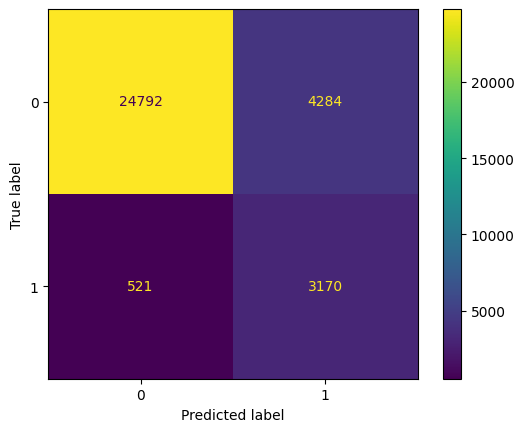

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

train_predictions = pipe.predict(X_train)

# generate the confusion matrix
cm = confusion_matrix(y_train, train_predictions, labels = pipe.classes_)

# display 
disp = ConfusionMatrixDisplay(confusion_matrix= cm,display_labels= pipe.classes_)

# show the plot
disp.plot()
plt.show()

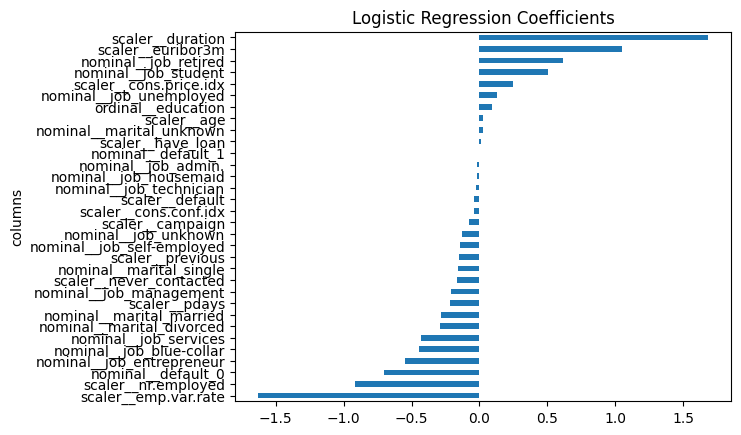

In [45]:
coefficients = pipe.named_steps['lr'].coef_[0] # the [0] is to extract the values in single array

# Generate labels for the coefficients
labels = pipe.named_steps['preprocess'].get_feature_names_out()

# converting into df 
lr_results = pd.DataFrame({"columns": labels, "values" : coefficients}).sort_values(by = "values")

# bar plot
lr_results.plot(kind = 'barh', x = 'columns', y = 'values', legend = False);

# Adding labels and title to the plot
plt.title('Logistic Regression Coefficients')

# Display the plot
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

In [46]:
lr_cv_scores = cross_val_score(pipe, X_train, y_train, cv = 5)

# print the score
print([f"{score:.3f}" for score in lr_cv_scores])
print('\n')
print(f"The mean accuracy across cv = 5 was {lr_cv_scores.mean():.3f}")

['0.851', '0.860', '0.847', '0.847', '0.861']


The mean accuracy across cv = 5 was 0.853


The mean accuracy across cv = 5 was 0.853

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier()
}



In [48]:
cat_nominal = ['job', 'marital', 'default']
cat_ordinal = ["education"]

education_order = [
    "illiterate",
    "basic.4y",
    "basic.6y",
    "basic.9y",
    "high.school",
    "professional.course",
    "university.degree",
    "unknown"
]
# OneHot for categorical bank info; passthrough engineered numeric flags
preprocessor = ColumnTransformer(
    transformers=[
        ("nominal", OneHotEncoder(handle_unknown="ignore"), cat_nominal),
        ("ordinal", OrdinalEncoder(categories=[education_order]), cat_ordinal),
        ('scaler', StandardScaler(), X_train.select_dtypes(include=['number']).columns.tolist())
    ],
    remainder="passthrough"  # everything else (engineered numeric cols) will flow through
)


In [49]:
import time
from sklearn.metrics import accuracy_score

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocessor), ("classifier", model)])
    
    start = time.time()
    pipe.fit(X_train, y_train)
    end = time.time()
    
    train_acc = accuracy_score(y_train, pipe.predict(X_train))
    test_acc = accuracy_score(y_test, pipe.predict(X_test))
    
    results.append({
        "Model": name,
        "Train Time": round(end - start, 3),
        "Train Accuracy": round(train_acc, 3),
        "Test Accuracy": round(test_acc, 3)
    })

# --- Results DataFrame ---
results_df = pd.DataFrame(results)
display(results_df)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.049,0.909,0.911
1,KNN,0.014,0.930,0.900
2,Decision Tree,0.110,1.000,0.889
3,SVM,3.546,0.911,0.909
4,RandomForest,1.352,1.000,0.915


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

## Observation:

- **Precision vs Recall:** Use case: Customer service teams are tasked with calling potential clients to encourage them to sign up for long-term deposits. 
    - Precision (avoiding false positives) is less important, because even if the model mistakenly flags some uninterested customers, calling them just means a wasted call. The downside is relatively low.
    - Recall (minimizing false negatives) is critical, because missing true positives means you fail to reach clients who would have signed up. That directly reduces revenue and defeats the campaign’s purpose.
- **Unbalanced dataset:** This is highly unbalanced dataset. only 11% of total subscribed for long deposite
    - Metrics like accuracy become misleading — the model seems good, but it’s useless for the minority class.
    - Classifiers like Logistic Regression, SVM,  k-NN are affected since they rely on balanced decision boundaries. 

Best parameters: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best score: 0.6312644181946596

Classification Report:
               precision    recall  f1-score   support

           0      0.982     0.891     0.934      7283
           1      0.499     0.867     0.633       909

    accuracy                          0.889      8192
   macro avg      0.740     0.879     0.784      8192
weighted avg      0.928     0.889     0.901      8192



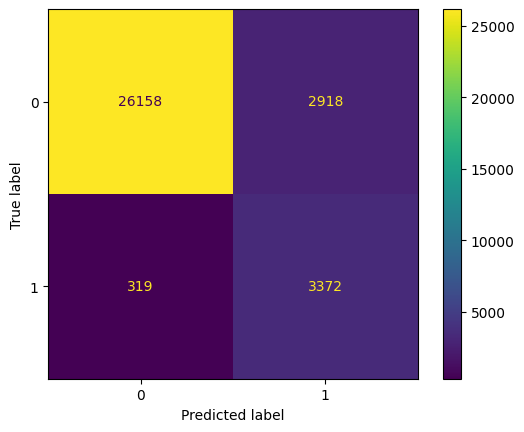

In [62]:
# RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': ['sqrt', 'log2'],
    #'classifier__class_weight': ['balanced_subsample', 'balanced', {0: 1.0, 1: 5.0} ]
    }

# Initialize GridSearchCV
pipe = Pipeline(steps=[("preprocess", preprocessor), ("classifier", RandomForestClassifier(random_state=42, class_weight={0: 1.0, 1: 5.0}))])

scorers = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring=scorers, n_jobs=-1, refit='f1')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_pipe = grid_search.best_estimator_

y_pred = best_pipe.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
ap = average_precision_score(y_test, y_pred)


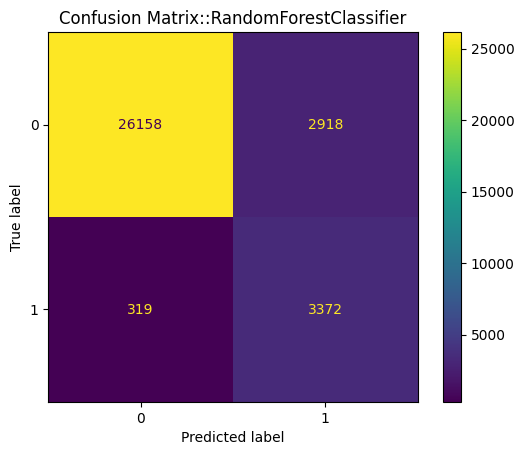

In [64]:
# Plot

train_predictions = best_pipe.predict(X_train)

# generate the confusion matrix
cm = confusion_matrix(y_train, train_predictions, labels = best_pipe.classes_)

# display 
disp = ConfusionMatrixDisplay(confusion_matrix= cm,display_labels= best_pipe.classes_)

# show the plot
disp.plot()
plt.title("Confusion Matrix::RandomForestClassifier")
plt.show()

In [51]:
# DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
pipe = Pipeline(steps=[("preprocess", preprocessor), ("classifier", DecisionTreeClassifier(random_state=42))])

grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_pipe = grid_search.best_estimator_

print("\nClassification Report:\n", classification_report(y_test, best_pipe.predict(X_test), digits=3))


#Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}
#Best score: 0.9072236189124047

#Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
#Best score: 0.601209794272713


Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Best score: 0.9087190053953629

Classification Report:
               precision    recall  f1-score   support

           0      0.942     0.956     0.949      7283
           1      0.603     0.531     0.565       909

    accuracy                          0.909      8192
   macro avg      0.773     0.744     0.757      8192
weighted avg      0.905     0.909     0.907      8192



In [52]:
# SVC

from sklearn.model_selection import GridSearchCV

# Define the parameter grid

param_grid = {'classifier__C': [0.1, 1, 10, 100, 1000], 
			'classifier__gamma': ['scale', 'auto'], 
			'classifier__kernel': ['rbf']}

# Initialize GridSearchCV
pipe = Pipeline(steps=[("preprocess", preprocessor), ("classifier", SVC(random_state=42))])

grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# accuracy
#Best parameters: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
#Best score: 0.9089632335687214

# precision
#Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
#Best score: 0.601209794272713

Best parameters: {'classifier__C': 0.1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best score: 0.6764296888079595


In [53]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Random Forest
#accuracy
#Best parameters: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
#Best score: 0.9144869692585715
#Precision
#Best parameters: {'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
#Best score: 0.7151432362189267
#recall
#Best parameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
#Best score: 0.9084271208070673

#SVM
# accuracy
#Best parameters: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
#Best score: 0.9089632335687214
# precision
#Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
#Best score: 0.601209794272713


#Decision Tree
# accuracy
#Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}
#Best score: 0.9072236189124047
# precision
#Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
#Best score: 0.601209794272713

n_neighbors = int(np.sqrt(X_train.shape[0]))
print(f'\nn_neighbors: {n_neighbors}')

# accruacy
"""
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=2000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, class_weight='balanced', min_samples_split=5),
    "SVM": SVC(kernel='rbf', C=100, gamma='0.01', class_weight='balanced',kernel='rbf'),
    "RandomForest": RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=5,  n_estimators=200)
}
"""
"""

# precision
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=2000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, class_weight='balanced', min_samples_split=10),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced'),
    "RandomForest": RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,  n_estimators=300)
}
"""


{'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}

# recall

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=2000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, class_weight='balanced', min_samples_split=10),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced'),
    "RandomForest": RandomForestClassifier(class_weight='balanced', max_depth=10, max_features='log2', min_samples_split=5,  n_estimators=300)
}




n_neighbors: 181


In [54]:
cat_nominal = ['job', 'marital', 'default']
cat_ordinal = ["education"]

education_order = [
    "illiterate",
    "basic.4y",
    "basic.6y",
    "basic.9y",
    "high.school",
    "professional.course",
    "university.degree",
    "unknown"
]
# OneHot for categorical bank info; passthrough engineered numeric flags
preprocessor = ColumnTransformer(
    transformers=[
        ("nominal", OneHotEncoder(handle_unknown="ignore"), cat_nominal),
        ("ordinal", OrdinalEncoder(categories=[education_order]), cat_ordinal),
        ('scaler', StandardScaler(), X.select_dtypes(include=['number']).columns.tolist())
    ],
    remainder="passthrough"  # everything else (engineered numeric cols) will flow through
)


In [55]:
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


results = []

for name, model in models.items():

    #print(f"********** model: {name} **********")
    pipe = Pipeline(steps=[("preprocess", preprocessor), ("classifier", model)])
    
    start = time.time()
    pipe.fit(X_train, y_train)
    end = time.time()

    y_pred_train = pipe.predict(X_train)
    y_pred = pipe.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred)

    #print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    #print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

    train_class_rpt = classification_report(y_train, y_pred_train, digits=3, output_dict=True )
    test_class_rpt = classification_report(y_test, y_pred, digits=3, output_dict=True )

    results.append({
        "Model": name,
        "Train Time": round(end - start, 3),
        "Train Accuracy": round(train_acc, 3),
        "Test Accuracy": round(test_acc, 3),
        "Train precision": round(train_class_rpt["1"]["precision"], 3),
        "Test precision": round(test_class_rpt["1"]["precision"], 3),
        "Train recall": round(train_class_rpt["1"]["recall"], 3),
        "Test recall": round(test_class_rpt["1"]["recall"], 3),
        "Train f1-score": round(train_class_rpt["1"]["f1-score"], 3),
        "Test f1-score": round(test_class_rpt["1"]["f1-score"], 3),
        "Train support": round(train_class_rpt["1"]["support"], 3),
        "Test support": round(test_class_rpt["1"]["support"], 3),
        
    })
    #print("************************")

# --- Results DataFrame ---
results_df = pd.DataFrame(results)
display(results_df)



,Model,Train Time,Train Accuracy,Test Accuracy,Train precision,Test precision,Train recall,Test recall,Train f1-score,Test f1-score,Train support,Test support
0,Logistic Regression,0.084,0.853,0.854,0.425,0.423,0.859,0.859,0.569,0.567,3691.0,909.0
1,KNN,0.024,0.930,0.900,0.756,0.568,0.562,0.398,0.645,0.468,3691.0,909.0
2,Decision Tree,0.101,0.878,0.856,0.478,0.428,0.966,0.886,0.640,0.577,3691.0,909.0
3,SVM,8.678,0.839,0.836,0.406,0.399,0.935,0.934,0.566,0.559,3691.0,909.0
4,RandomForest,2.927,0.874,0.862,0.471,0.441,0.954,0.914,0.631,0.595,3691.0,909.0


In [56]:
# using SMOTENC to balance the dataset Syntheticly see if it improves any

In [57]:
!pip install -q imbalanced-learn



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [58]:
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTENC


results = []
results_plot = {}

# Get categorical column names
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

# Get the indices of these columns
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_cols]
#print(categorical_indices)
#print(type(categorical_indices))
smote = SMOTENC(categorical_features=categorical_indices,random_state=42)

X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


for name, model in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocessor), ("classifier", model)])
    
    start = time.time()
    pipe.fit(X_train_bal, y_train_bal)
    end = time.time()
    
    train_acc = accuracy_score(y_train, pipe.predict(X_train))
    test_acc = accuracy_score(y_test, pipe.predict(X_test))

    train_class_rpt = classification_report(y_train, y_pred_train, digits=3, output_dict=True )
    test_class_rpt = classification_report(y_test, y_pred, digits=3, output_dict=True )

    results.append({
        "Model": name,
        "Train Time": round(end - start, 3),
        "Train Accuracy": round(train_acc, 3),
        "Test Accuracy": round(test_acc, 3),
        "Train precision": round(train_class_rpt["1"]["precision"], 3),
        "Test precision": round(test_class_rpt["1"]["precision"], 3),
        "Train recall": round(train_class_rpt["1"]["recall"], 3),
        "Test recall": round(test_class_rpt["1"]["recall"], 3),
        "Train f1-score": round(train_class_rpt["1"]["f1-score"], 3),
        "Test f1-score": round(test_class_rpt["1"]["f1-score"], 3),
        "Train support": round(train_class_rpt["1"]["support"], 3),
        "Test support": round(test_class_rpt["1"]["support"], 3),
        
    })


# --- Results DataFrame ---
results_df = pd.DataFrame(results)
display(results_df)



['job', 'marital', 'education']


,Model,Train Time,Train Accuracy,Test Accuracy,Train precision,Test precision,Train recall,Test recall,Train f1-score,Test f1-score,Train support,Test support
0,Logistic Regression,0.153,0.859,0.858,0.471,0.441,0.954,0.914,0.631,0.595,3691.0,909.0
1,KNN,0.028,0.900,0.856,0.471,0.441,0.954,0.914,0.631,0.595,3691.0,909.0
2,Decision Tree,0.232,0.907,0.880,0.471,0.441,0.954,0.914,0.631,0.595,3691.0,909.0
3,SVM,20.028,0.854,0.846,0.471,0.441,0.954,0.914,0.631,0.595,3691.0,909.0
4,RandomForest,6.773,0.889,0.876,0.471,0.441,0.954,0.914,0.631,0.595,3691.0,909.0


## Final Observation
- By considering the usecase, Model trained for better recall than accuracy
- RandomForestClassifier & Decision Tree faired better with 3 seconds training time, and with better recall & accuracy. Precision is also fair enough(50% false positive increase)
- SVM worked better after RandomForestClassifier, but it requires higher training time(more resources needed)
- SMOTE didn't improve the model performance  

##### Questions